# purpose:

To demonstrate and check that the preprocessing script is correctly working. I have qualitatively concluded that the script is working good.

In [42]:
import sys, os
dir1 = os.path.abspath(os.path.join(os.path.abspath(''), '..', '..'))
if not dir1 in sys.path: sys.path.append(dir1)

from utils.environment import setup_data_vars

setup_data_vars()

In [46]:
# View the results from directory 
id = 1
slice_num = 90
axis = 0
anatomy = 'Bladder'
img_dir = os.path.join(os.environ.get('MedSAM_preprocessed'), 'imgs', f'axis{str(axis)}')
gt_dir = os.path.join(os.environ.get('MedSAM_preprocessed'), 'gts', anatomy, f'axis{str(axis)}')

img_path = os.path.join(img_dir, f'CT_zzAMLART_{str(id).zfill(3)}-{str(slice_num).zfill(3)}.npy')
gt_path = os.path.join(gt_dir, f'CT_{anatomy}_zzAMLART_{str(id).zfill(3)}-{str(slice_num).zfill(3)}.npy')

print(img_path)
print(gt_path)

/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0/CT_zzAMLART_001-090.npy
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Bladder/axis0/CT_Bladder_zzAMLART_001-090.npy


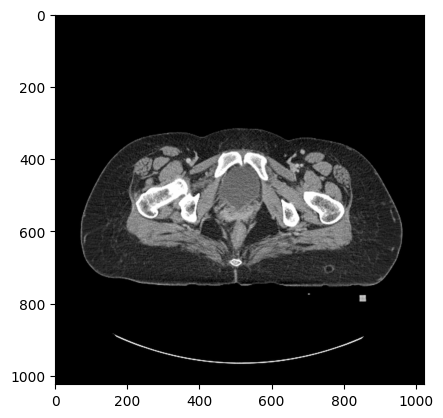

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Load the npy file
data = np.load(img_path)

# Display the image
plt.imshow(data)
plt.show()


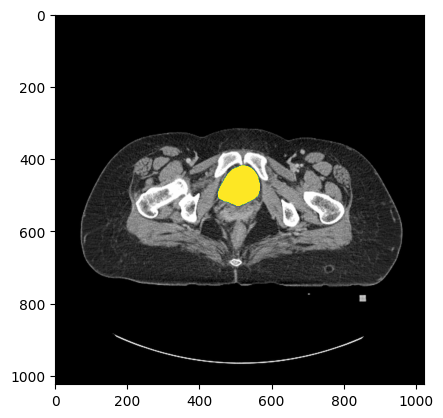

In [48]:
gt = np.load(gt_path)

alpha_mask_pred = np.where(gt > 0, 1, 0).astype(np.float32)
plt.imshow(data, cmap='gray')
plt.imshow(gt, alpha=alpha_mask_pred, cmap='viridis')
plt.show()

# Checking that the slices align with the up-processed variant

In [49]:
print(img_dir)
print(gt_dir)

/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Bladder/axis0


In [50]:
# For the given image id, create a subfigure of all the slices that contain segmentations.

id_slices_imgs = sorted([f for f in os.listdir(img_dir) if f.startswith(f'CT_zzAMLART_{str(id).zfill(3)}')])
id_slices_gts = sorted([f for f in os.listdir(gt_dir) if f.startswith(f'CT_{anatomy}_zzAMLART_{str(id).zfill(3)}')])

In [51]:
list(zip(id_slices_imgs, id_slices_gts))

[('CT_zzAMLART_001-070.npy', 'CT_Bladder_zzAMLART_001-085.npy'),
 ('CT_zzAMLART_001-071.npy', 'CT_Bladder_zzAMLART_001-086.npy'),
 ('CT_zzAMLART_001-072.npy', 'CT_Bladder_zzAMLART_001-087.npy'),
 ('CT_zzAMLART_001-073.npy', 'CT_Bladder_zzAMLART_001-088.npy'),
 ('CT_zzAMLART_001-074.npy', 'CT_Bladder_zzAMLART_001-089.npy'),
 ('CT_zzAMLART_001-075.npy', 'CT_Bladder_zzAMLART_001-090.npy'),
 ('CT_zzAMLART_001-076.npy', 'CT_Bladder_zzAMLART_001-091.npy'),
 ('CT_zzAMLART_001-077.npy', 'CT_Bladder_zzAMLART_001-092.npy'),
 ('CT_zzAMLART_001-078.npy', 'CT_Bladder_zzAMLART_001-093.npy'),
 ('CT_zzAMLART_001-079.npy', 'CT_Bladder_zzAMLART_001-094.npy'),
 ('CT_zzAMLART_001-080.npy', 'CT_Bladder_zzAMLART_001-095.npy'),
 ('CT_zzAMLART_001-081.npy', 'CT_Bladder_zzAMLART_001-096.npy'),
 ('CT_zzAMLART_001-082.npy', 'CT_Bladder_zzAMLART_001-097.npy'),
 ('CT_zzAMLART_001-083.npy', 'CT_Bladder_zzAMLART_001-098.npy'),
 ('CT_zzAMLART_001-084.npy', 'CT_Bladder_zzAMLART_001-099.npy'),
 ('CT_zzAMLART_001-085.np

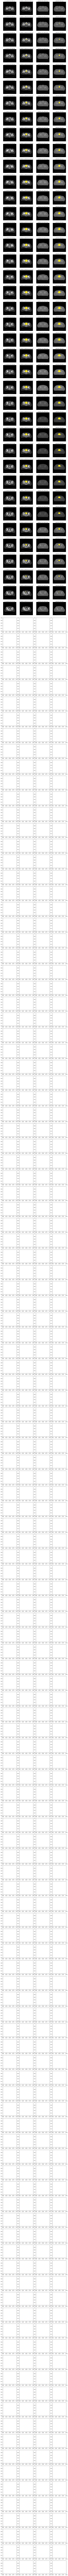

In [52]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

nrows = len(id_slices_gts)
ncols = 4

fig, axs = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))

for i, gt in enumerate(id_slices_gts):
   
    id = int(gt.split('_')[3].split('-')[0])
    slice_num = int(gt.split('_')[3].split('-')[1].split('.')[0])
    axis = int(gt_dir.split('axis')[1])

    # processed counterpart
    img = f'CT_zzAMLART_{str(id).zfill(3)}-{str(slice_num).zfill(3)}.npy'
    img_path = os.path.join(img_dir, img)
    gt_path = os.path.join(gt_dir, gt)

    data = np.load(img_path)
    gt_data = np.load(gt_path)
    alpha_mask_pred = np.where(gt_data > 0, 1, 0).astype(np.float32)
    
    axs[i, 0].imshow(data, cmap='gray')
    axs[i, 0].set_title(img, fontsize=8)
    axs[i, 0].axis('off')

    axs[i, 1].imshow(data, cmap='gray')
    axs[i, 1].imshow(gt_data, alpha=alpha_mask_pred, cmap='viridis')
    axs[i, 1].axis('off')
    axs[i, 1].set_title(gt, fontsize=8)

    # Now the un-processed counterpart
    slices = [slice(None)] * 3
    slices[axis] = slice_num

    unprocessed_img_path = os.path.join(os.environ.get('nnUNet_raw'), os.environ.get(anatomy), os.environ.get('data_trainingImages'), f'zzAMLART_{str(id).zfill(3)}_0000.nii.gz')
    unprocessed_gt_path = os.path.join(os.environ.get('nnUNet_raw'), os.environ.get(anatomy), os.environ.get('data_trainingLabels'), f'zzAMLART_{str(id).zfill(3)}.nii.gz')

    data = sitk.GetArrayFromImage(sitk.ReadImage(unprocessed_img_path))
    gt = sitk.GetArrayFromImage(sitk.ReadImage(unprocessed_gt_path))

    data = data[tuple(slices)]
    gt = gt[tuple(slices)]

    alpha_mask_pred = np.where(gt > 0, 1, 0).astype(np.float32)
    axs[i, 2].imshow(data, cmap='gray')
    axs[i, 2].set_title(f'zzAMLART_{str(id).zfill(3)}_0000.nii.gz', fontsize=8)
    axs[i, 2].axis('off')
    
    axs[i, 3].imshow(data, cmap='gray')
    axs[i, 3].imshow(gt, alpha=alpha_mask_pred, cmap='viridis')
    axs[i, 3].set_title(f'zzAMLART_{str(id).zfill(3)}.nii.gz', fontsize=8)
    axs[i, 3].axis('off')
